In [1]:
import sys
args=sys.argv
%pylab inline
import gromacs.formats
import pandas as pd
import os
path = os.getcwd()# D:\Lab\data\gp120\GIN_论文相关材料\代码\RMSF_gyc
path

Populating the interactive namespace from numpy and matplotlib
NOTE: Some configuration directories are not set up yet: 
	C:\Users\chh\.gromacswrapper
	C:\Users\chh\.gromacswrapper\qscripts
	C:\Users\chh\.gromacswrapper\templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


D:\anaconda\envs\pytorch\lib\site-packages\gromacs\__init__.py:288: GromacsImportWarning: Some Gromacs commands were NOT found; maybe source GMXRC first? The following are missing:
['release']

  category=GromacsImportWarning)


'D:\\anaconda_env\\pytorch37\\绘图代码和材料'

In [2]:
# A4ZPX2
tied1_name_l = ['Q5G5V8','Q5G5V4','Q6EG58','A4ZPW4','P04578','Q4QXE8','A8CVW4','Q2MKA8','A1EAH8','A1EAI4','Q27Q69','Q70014','B2YFU9','B2YFQ5','O89960']
# A1EAI3
tied2_name_l = ['Q5G5U7','Q5G5U5','A7KVY7','Q5G5V1','B0FBI6','Q5G5V5','A1EAI2','A1EAI0','Q6TCV7','Q202K1','Q202K7','Q27Q74','A1EAI7','B2YFT0','Q8JDI3']
# A4ZPW9
tied3_name_l = ['A4ZPX1','A4ZPW7','A4ZPW8','Q5G5V2','Q5G5U6','A1EAG8','A1EAH7','A0MTL0','A1EAH6','A1EAH3','B2YFP6','B2YFP1','B2YFU4','B2YFV4','B2YFS0']
tied_name=tied1_name_l+tied2_name_l+tied3_name_l

# tied1_traj_path= 'E:\\data\\gp120\\Data\\trajs_5fyj\\1\\'
# tied2_traj_path = 'E:\\data\\gp120\\Data\\trajs_5fyj\\2\\'
# tied3_traj_path='E:\\data\\gp120\\Data\\trajs_5fyj\\3\\'
tied1_traj_path= 'D:\\Lab\\data\\gp120\\5roles\\data\\trajs_5fyj\\1b\\'
tied2_traj_path = 'D:\\Lab\\data\\gp120\\5roles\\data\\trajs_5fyj\\2\\'
tied3_traj_path= 'D:\\Lab\\data\\gp120\\5roles\\data\\trajs_5fyj\\3\\'
aln_path1='msa_t1.txt'
aln_path2='msa_t2.txt'
aln_path3='msa_t3.txt'

In [3]:
def alntxt(aln_path):
    fr=open(aln_path, 'r')  #rmsd tiedla,lb三条序列
    dic={}
    for line in fr:
        if line.startswith('>'):
            name=line.split()[0]
            name=name[4:10]
            dic[name]=''
        else:
            dic[name]+=line.replace('\n','')#构建字典
    fr.close()
    list_tied=[]
    list_tied_name=[]
    ss=sorted(dic.items())
    for k,v in ss:
        list_tied_name.append(k)
        list_tied.append(v)
    print(list_tied_name)
    return list_tied_name,list_tied  

In [4]:
list_tied1_name,list_tied1=alntxt(aln_path1)
list_tied2_name,list_tied2=alntxt(aln_path2)
list_tied3_name,list_tied3=alntxt(aln_path3)

seq_str={}
for i in range(15):
    seq_str[list_tied1_name[i]]=list_tied1[i]
for i in range(15):
    seq_str[list_tied2_name[i]]=list_tied2[i]
for i in range(15):
    seq_str[list_tied3_name[i]]=list_tied3[i]
sr=list(range(95,186))+list(range(302,308))+list(range(392,406))+list(range(450,459))

['A1EAH8', 'A1EAI4', 'A4ZPW4', 'A8CVW4', 'B2YFQ5', 'B2YFU9', 'O89960', 'P04578', 'Q27Q69', 'Q2MKA8', 'Q4QXE8', 'Q5G5V4', 'Q5G5V8', 'Q6EG58', 'Q70014']
['A1EAI0', 'A1EAI2', 'A1EAI7', 'A7KVY7', 'B0FBI6', 'B2YFT0', 'Q202K1', 'Q202K7', 'Q27Q74', 'Q5G5U5', 'Q5G5U7', 'Q5G5V1', 'Q5G5V5', 'Q6TCV7', 'Q8JDI3']
['A0MTL0', 'A1EAG8', 'A1EAH3', 'A1EAH6', 'A1EAH7', 'A4ZPW7', 'A4ZPW8', 'A4ZPX1', 'B2YFP1', 'B2YFP6', 'B2YFS0', 'B2YFU4', 'B2YFV4', 'Q5G5U6', 'Q5G5V2']


In [5]:
import pickle

name_path='attetion-v0-48-name-17-6.p'
with open(name_path ,'rb') as f:
    seq_name = pickle.load(f)
# print(len(seq_name))

# with open('/home/dldx/UniRep/result/attetion-v0-48-17-6.p', 'rb') as f:
#     atts = pickle.load(f)
with open('attetion-45-layer3.p', 'rb') as f:
    atts = pickle.load(f)
with open('attetion-45-layer3_names.p', 'rb') as f:
    name_L = pickle.load(f)

tmp_l=[]
for l in name_L:
    tmp_l+=l
name_list=[]
for name_str in tmp_l:
    tmp=name_str.split('-')[1]
    if tmp not in name_list:
        name_list.append(tmp)
print('name_list：\n',name_list)

a_dict={}
for i in range(45):
    title=name_list[i]
    tmp=atts[i]
    a_dict[title]=tmp
s_dict = sorted(a_dict)
len(tied_name)

name_list：
 ['B2YFU4', 'A4ZPW7', 'Q5G5U6', 'B2YFV4', 'B2YFS0', 'A0MTL0', 'A1EAG8', 'B2YFP6', 'A1EAH3', 'A4ZPX1', 'Q5G5V2', 'B2YFP1', 'A1EAH6', 'A1EAH7', 'A4ZPW8', 'Q4QXE8', 'Q27Q69', 'A4ZPW4', 'Q5G5V4', 'Q6EG58', 'B2YFQ5', 'Q5G5V8', 'Q70014', 'A1EAH8', 'A1EAI4', 'Q2MKA8', 'A8CVW4', 'O89960', 'B2YFU9', 'P04578', 'B2YFT0', 'B0FBI6', 'A1EAI2', 'Q5G5U7', 'Q5G5V5', 'Q27Q74', 'Q202K7', 'A7KVY7', 'Q5G5V1', 'Q6TCV7', 'A1EAI0', 'A1EAI7', 'Q5G5U5', 'Q8JDI3', 'Q202K1']


45

In [6]:
count=0
for i in (seq_str[tied_name]):
    if i=='-':
        continue
    elif i not in seq_A:
        print(i)


TypeError: unhashable type: 'list'

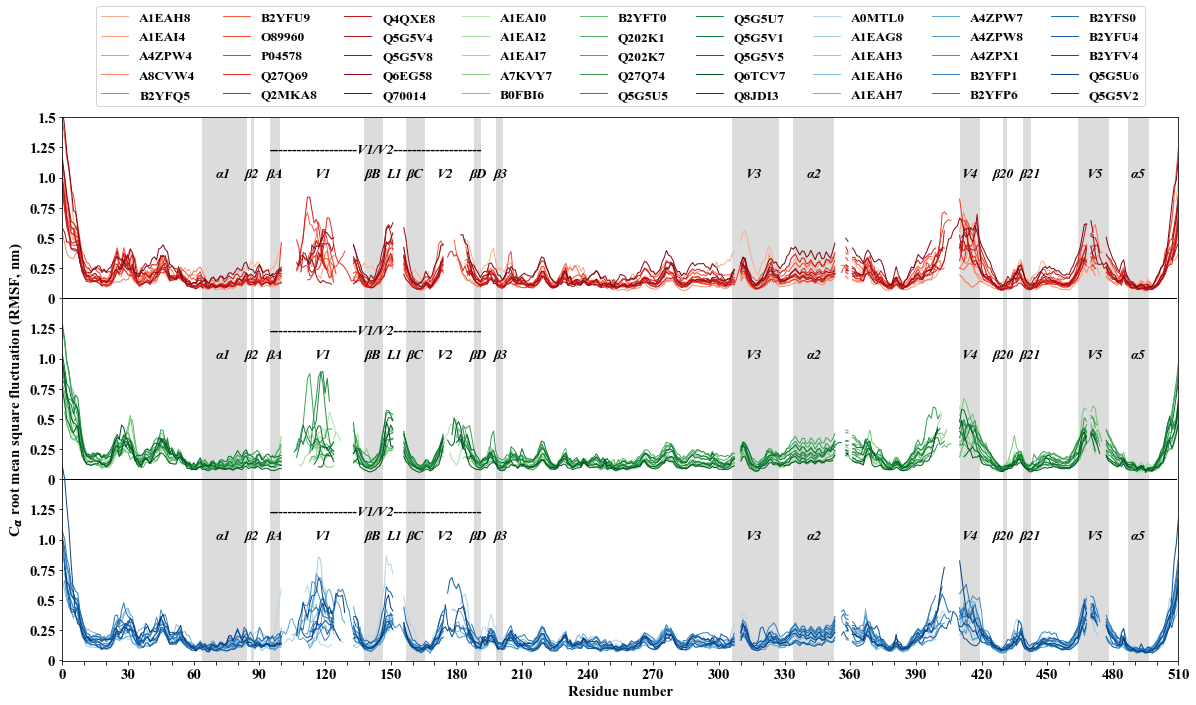

In [8]:
rc('font', family='Times New Roman', size=15,weight='bold')
# rc('font', family='serif', size=15)
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(0,525)
colors = iter(cm.Reds(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
my_list=[]
for tied_name in list_tied1_name:


    rmsf_tied=gromacs.formats.XVG(tied1_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)

    rmsf_m.append(mean(rmsf_tied))
    List=seq_str[tied_name]
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:
            list2.append(3+rmsf_tied[i])
            i=i+1
    my_list.append(List)
    my_list.append(list2)
    #print(list2)
    plot(list2,color=next(colors), linewidth=1,label=tied_name)
plot([3]*510, color='black', linestyle='-', linewidth=1)
#==========================================================
colors = iter(cm.Greens(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
my_list=[]
for tied_name in list_tied2_name:

    rmsf_tied=gromacs.formats.XVG(tied2_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)
    rmsf_m.append(mean(rmsf_tied))
    List=seq_str[tied_name]
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:

            list2.append(1.5+rmsf_tied[i])
            i=i+1
    my_list.append(List)
    my_list.append(list2)
    plot(list2,color=next(colors), linewidth=1,label=tied_name)
plot([1.5]*510, color='black', linestyle='-', linewidth=1)
#====================================================================
colors = iter(cm.Blues(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
my_list=[]
for tied_name in list_tied3_name:

    rmsf_tied=gromacs.formats.XVG(tied3_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)
    rmsf_m.append(mean(rmsf_tied))
    List=seq_str[tied_name]
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:

            list2.append(rmsf_tied[i])
            i=i+1
    my_list.append(List)
    my_list.append(list2)
    plot(list2,color=next(colors), linewidth=1,label=tied_name)
legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", borderaxespad=0,ncol=9, fontsize=13.5)
xlim(0,510) 
x_ticks=[0, 10, 20, 30, 40,50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, \
         250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, \
         480, 490, 500, 510]
x_label=[0,'', '', 30, '', '', 60, '', '', 90, '', '', 120, '', '', 150, '', '',  180, '', '',   210,  '',  '',  240, \
         '', '',270, '', '',  300,'', '', 330,'', '', 360, '', '', 390, '', '', 420, '', '',  450, '', '', \
         480, '','', 510]
xticks(x_ticks,x_label,fontsize=15)

ylim(-0.005,4.5)
y_ticks=[0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5]
y_label=[0,0.25,0.5,0.75,1.0,1.25,0,  0.25,0.5,0.75,1.0,1.25,0,  0.25,0.5,0.75,1.0,1.25,1.5]
yticks(y_ticks,y_label,fontsize=15)

xlabel("Residue number",fontsize=15, family='times new roman',weight='bold')
ylabel(r"C$_\alpha$ root mean square fluctuation (RMSF, nm)",fontsize=15, family='times new roman',weight='bold')
# 蓝色
plt.text(70,1, 'α1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(83,1, 'β2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(93, 1, 'βA', family='times new roman', fontsize=14, \
            style='italic')
plt.text(115, 1, 'V1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(138, 1, 'βB', family='times new roman', fontsize=14, \
            style='italic')
plt.text(148, 1, 'L1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(157, 1, 'βC', family='times new roman', fontsize=14, \
            style='italic')
plt.text(171, 1, 'V2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(186, 1, 'βD', family='times new roman', fontsize=14, \
            style='italic')
plt.text(197, 1, 'β3', family='times new roman', fontsize=14, \
            style='italic')
plt.text(312, 1, 'V3', family='times new roman', fontsize=14, \
            style='italic')
plt.text(340, 1, 'α2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(411, 1, 'V4', family='times new roman', fontsize=14, \
            style='italic')
plt.text(425, 1, 'β20', family='times new roman', fontsize=14, \
            style='italic')
plt.text(437, 1, 'β21', family='times new roman', fontsize=14, \
            style='italic')
plt.text(468, 1, 'V5', family='times new roman', fontsize=14, \
            style='italic')
plt.text(488, 1, 'α5', family='times new roman', fontsize=14, \
            style='italic')

plt.text(95, 1.2, '-------------------V1/V2-------------------', family='times new roman', fontsize=14, \
            style='italic')
# 绿色
plt.text(70, 2.5, 'α1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(83, 2.5, 'β2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(93, 2.5, 'βA', family='times new roman', fontsize=14, \
            style='italic')
plt.text(115, 2.5, 'V1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(138, 2.5, 'βB', family='times new roman', fontsize=14, \
            style='italic')
plt.text(148, 2.5, 'L1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(157, 2.5, 'βC', family='times new roman', fontsize=14, \
            style='italic')
plt.text(171, 2.5, 'V2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(186, 2.5, 'βD', family='times new roman', fontsize=14, \
            style='italic')
plt.text(197, 2.5, 'β3', family='times new roman', fontsize=14, \
            style='italic')
plt.text(312, 2.5, 'V3', family='times new roman', fontsize=14, \
            style='italic')
# plt.text(325, 2.5, 'β13', family='times new roman', fontsize=14, \
#             style='italic')
plt.text(340, 2.5, 'α2', family='times new roman', fontsize=14, \
            style='italic')
# plt.text(410, 0.8, 'β19', family='times new roman', fontsize=12, \
#             style='italic')
plt.text(411, 2.5, 'V4', family='times new roman', fontsize=14, \
            style='italic')
plt.text(425, 2.5, 'β20', family='times new roman', fontsize=14, \
            style='italic')
plt.text(437, 2.5, 'β21', family='times new roman', fontsize=14, \
            style='italic')
plt.text(468, 2.5, 'V5', family='times new roman', fontsize=14, \
            style='italic')
plt.text(488, 2.5, 'α5', family='times new roman', fontsize=14, \
            style='italic')

plt.text(95, 2.7, '-------------------V1/V2-------------------', family='times new roman', fontsize=14, \
            style='italic')
# 红色
plt.text(70, 4, 'α1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(83, 4, 'β2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(93, 4, 'βA', family='times new roman', fontsize=14, \
            style='italic')
plt.text(115, 4, 'V1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(138, 4, 'βB', family='times new roman', fontsize=14, \
            style='italic')
plt.text(148, 4, 'L1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(157, 4, 'βC', family='times new roman', fontsize=14, \
            style='italic')
plt.text(171, 4, 'V2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(186, 4, 'βD', family='times new roman', fontsize=14, \
            style='italic')
plt.text(197, 4, 'β3', family='times new roman', fontsize=14, \
            style='italic')
plt.text(312, 4, 'V3', family='times new roman', fontsize=14, \
            style='italic')
plt.text(340, 4, 'α2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(411, 4, 'V4', family='times new roman', fontsize=14, \
            style='italic')
plt.text(425, 4, 'β20', family='times new roman', fontsize=14, \
            style='italic')
plt.text(437, 4, 'β21', family='times new roman', fontsize=14, \
            style='italic')
plt.text(468, 4, 'V5', family='times new roman', fontsize=14, \
            style='italic')
plt.text(488, 4, 'α5', family='times new roman', fontsize=14, \
            style='italic')

plt.text(95, 4.2, '-------------------V1/V2-------------------', family='times new roman', fontsize=14, \
            style='italic')
fill_between(range(64,85),-0.001, 4.5, color='gainsboro')
fill_between(range(86,88),-0.001, 4.5, color='gainsboro')
fill_between(range(95,100),-0.001, 4.5, color='gainsboro')
fill_between(range(138,147),-0.001, 4.5, color='gainsboro')
fill_between(range(157,166),-0.001, 4.5, color='gainsboro')
fill_between(range(188,192),-0.001, 4.5, color='gainsboro')
fill_between(range(198,202),-0.001, 4.5, color='gainsboro')
fill_between(range(306,328),-0.001, 4.5, color='gainsboro')
fill_between(range(334,353),-0.001, 4.5, color='gainsboro')
fill_between(range(410,420),-0.001, 4.5, color='gainsboro')
fill_between(range(430,432),-0.001, 4.5, color='gainsboro')
fill_between(range(439,443),-0.001, 4.5, color='gainsboro')
fill_between(range(464,479),-0.001, 4.5, color='gainsboro')
fill_between(range(487,497),-0.001, 4.5, color='gainsboro')
plt.savefig('RMSF_latest_chh.png', format='png', bbox_inches = 'tight',dpi=300)

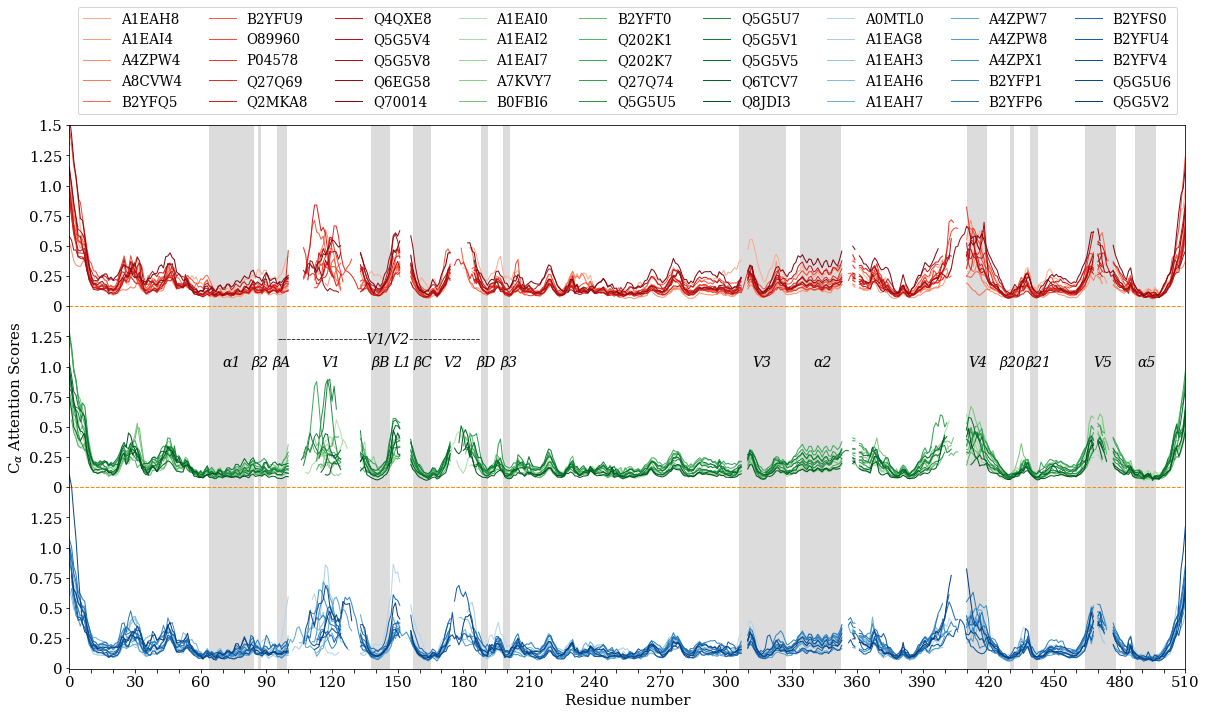

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(0,525)
colors = iter(cm.Reds(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
my_list=[]
for tied_name in list_tied1_name:


    rmsf_tied=gromacs.formats.XVG(tied1_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)

    rmsf_m.append(mean(rmsf_tied))
    List=seq_str[tied_name]
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:
            list2.append(3+rmsf_tied[i])
            i=i+1
    my_list.append(List)
    my_list.append(list2)
    #print(list2)
    plot(list2,color=next(colors), linewidth=1,label=tied_name)
plot([1.5]*510, color='darkorange', linestyle='--', linewidth=1)
#==========================================================
colors = iter(cm.Greens(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
my_list=[]
for tied_name in list_tied2_name:

    rmsf_tied=gromacs.formats.XVG(tied2_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)
    rmsf_m.append(mean(rmsf_tied))
    List=seq_str[tied_name]
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:

            list2.append(1.5+rmsf_tied[i])
            i=i+1
    my_list.append(List)
    my_list.append(list2)
    plot(list2,color=next(colors), linewidth=1,label=tied_name)
plot([3]*510, color='darkorange', linestyle='--', linewidth=1)
#====================================================================
colors = iter(cm.Blues(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
my_list=[]
for tied_name in list_tied3_name:

    rmsf_tied=gromacs.formats.XVG(tied3_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)
    rmsf_m.append(mean(rmsf_tied))
    List=seq_str[tied_name]
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:

            list2.append(rmsf_tied[i])
            i=i+1
    my_list.append(List)
    my_list.append(list2)
    plot(list2,color=next(colors), linewidth=1,label=tied_name)
#plot([4.5]*510, color='darkorange', linestyle='--', linewidth=1)
#========================================================================
#all_mean=mean(rmsf_m)
# plot(x, [mean(rmsf_m) for i in x], color='darkorange', linestyle='--', linewidth=3,label='Mean')


legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", borderaxespad=0,ncol=9, fontsize=13.5)
xlim(0,510) 
    #x_ticks = [0,10,20,30,40, 50, 60,70, 80,90, 100, 110,120,130,140,150,160, 170, 180,190,200,230, 240, 248,258,268,278, 288,  296, 306,317,327,  337, 346,356,366,376,  400, 410,420,430,440,  450, 463,473,483, 496]
x_ticks=[0, 10, 20, 30, 40,50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, \
         250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, \
         480, 490, 500, 510]
x_label=[0,'', '', 30, '', '', 60, '', '', 90, '', '', 120, '', '', 150, '', '',  180, '', '',   210,  '',  '',  240, \
         '', '',270, '', '',  300,'', '', 330,'', '', 360, '', '', 390, '', '', 420, '', '',  450, '', '', \
         480, '','', 510]
#print(len(x_ticks))
xticks(x_ticks,x_label,fontsize=15)

ylim(-0.005,4.5)
y_ticks=[0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5]
y_label=[0,0.25,0.5,0.75,1.0,1.25,0,  0.25,0.5,0.75,1.0,1.25,0,  0.25,0.5,0.75,1.0,1.25,1.5]
yticks(y_ticks,y_label,fontsize=15)

xlabel("Residue number",fontsize=15)
ylabel(r"C$_\alpha$ Attention Scores",fontsize=15)

plt.text(70, 2.5, 'α1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(83, 2.5, 'β2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(93, 2.5, 'βA', family='times new roman', fontsize=14, \
            style='italic')
plt.text(115, 2.5, 'V1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(138, 2.5, 'βB', family='times new roman', fontsize=14, \
            style='italic')
plt.text(148, 2.5, 'L1', family='times new roman', fontsize=14, \
            style='italic')
plt.text(157, 2.5, 'βC', family='times new roman', fontsize=14, \
            style='italic')
plt.text(171, 2.5, 'V2', family='times new roman', fontsize=14, \
            style='italic')
plt.text(186, 2.5, 'βD', family='times new roman', fontsize=14, \
            style='italic')
plt.text(197, 2.5, 'β3', family='times new roman', fontsize=14, \
            style='italic')
plt.text(312, 2.5, 'V3', family='times new roman', fontsize=14, \
            style='italic')
# plt.text(325, 2.5, 'β13', family='times new roman', fontsize=14, \
#             style='italic')
plt.text(340, 2.5, 'α2', family='times new roman', fontsize=14, \
            style='italic')
# plt.text(410, 0.8, 'β19', family='times new roman', fontsize=12, \
#             style='italic')
plt.text(411, 2.5, 'V4', family='times new roman', fontsize=14, \
            style='italic')
plt.text(425, 2.5, 'β20', family='times new roman', fontsize=14, \
            style='italic')
plt.text(437, 2.5, 'β21', family='times new roman', fontsize=14, \
            style='italic')
plt.text(468, 2.5, 'V5', family='times new roman', fontsize=14, \
            style='italic')
plt.text(488, 2.5, 'α5', family='times new roman', fontsize=14, \
            style='italic')

plt.text(95, 2.7, '-------------------V1/V2-----------------', family='times new roman', fontsize=14, \
            style='italic')
# fill_between(range(0,7), -0.001, 0.4, color='gainsboro')
# fill_between(range(11,14),-0.001, 0.4, color='gainsboro')
fill_between(range(64,85),-0.001, 4.5, color='gainsboro')
fill_between(range(86,88),-0.001, 4.5, color='gainsboro')
fill_between(range(95,100),-0.001, 4.5, color='gainsboro')
fill_between(range(138,147),-0.001, 4.5, color='gainsboro')
fill_between(range(157,166),-0.001, 4.5, color='gainsboro')

fill_between(range(188,192),-0.001, 4.5, color='gainsboro')
fill_between(range(198,202),-0.001, 4.5, color='gainsboro')
# fill_between(range(198,200),-0.001, 4.5, color='gainsboro')
# fill_between(range(212,216),-0.001, 4.5, color='gainsboro')
# fill_between(range(220,226),-0.001, 4.5, color='gainsboro')
# fill_between(range(281,296),-0.001, 4.5, color='gainsboro')
# fill_between(range(328,333),-0.001, 4.5, color='gainsboro')
fill_between(range(306,328),-0.001, 4.5, color='gainsboro')
fill_between(range(334,353),-0.001, 4.5, color='gainsboro')
fill_between(range(410,420),-0.001, 4.5, color='gainsboro')
fill_between(range(430,432),-0.001, 4.5, color='gainsboro')
fill_between(range(439,443),-0.001, 4.5, color='gainsboro')
fill_between(range(464,479),-0.001, 4.5, color='gainsboro')
fill_between(range(487,497),-0.001, 4.5, color='gainsboro')
plt.savefig('data/RMSF_latest.png', format='png', bbox_inches = 'tight',dpi=300)

In [ ]:
def draw_attetion(color,list_tied_name,num,list_tied,path):  
    fig, ax = plt.subplots(figsize=(20, 10))
    x = np.arange(0,525)
    colors = color
    c=0
    rmsf_m=[]
    my_list=[]
    for tied_name in list_tied_name:

        rmsf_tied=a_dict[num+tied_name]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)
        rmsf_m.append(mean(rmsf_tied))
        List=[]

        List=list(list_tied[c])
        c=c+1;
#    print(len(List))
        i=0
        list2=[]
        for idx in range(len(List)):
            if List[idx]=='-':
                list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
            else:

                list2.append(rmsf_tied[i])
                i=i+1
        my_list.append(List)
        my_list.append(list2)
        plot(list2,color=next(colors), linewidth=1,label=tied_name)
    #all_mean=mean(rmsf_m)
# plot(x, [mean(rmsf_m) for i in x], color='darkorange', linestyle='--', linewidth=3,label='Mean')


    legend(ncol=8, loc='upper right',fontsize=15)
    xlim(0,510) 
    #x_ticks = [0,10,20,30,40, 50, 60,70, 80,90, 100, 110,120,130,140,150,160, 170, 180,190,200,230, 240, 248,258,268,278, 288,  296, 306,317,327,  337, 346,356,366,376,  400, 410,420,430,440,  450, 463,473,483, 496]
    x_ticks=[0, 10, 20, 30, 40,50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, \
         250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, \
         480, 490, 500, 510]
    x_label=[0,'', '', 30, '', '', 60, '', '', 90, '', '', 120, '', '', 150, '', '',  180, '', '',   210,  '',  '',  240, \
         '', '',270, '', '',  300,'', '', 330,'', '', 360, '', '', 390, '', '', 420, '', '',  450, '', '', \
         480, '','', 510]
    print(len(x_ticks))
    xticks(x_ticks,x_label,fontsize=15)

    ylim(-0.005,0.4)
    yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],fontsize=15)
    xlabel("Residue number",fontsize=15)
    ylabel(r"C$_\alpha$ Attention Scores",fontsize=15)

    plt.text(70, 0.3, 'α1', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(83, 0.3, 'β2', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(93, 0.3, 'βA', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(115, 0.3, 'V1', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(138, 0.3, 'βB', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(148, 0.3, 'L1', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(157, 0.3, 'βC', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(171, 0.3, 'V2', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(186, 0.3, 'βD', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(197, 0.3, 'β3', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(312, 0.3, 'V3', family='fantasy', fontsize=14, \
            style='italic')
# plt.text(325, 0.3, 'β13', family='fantasy', fontsize=14, \
#             style='italic')
    plt.text(340, 0.3, 'α2', family='fantasy', fontsize=14, \
            style='italic')
# plt.text(410, 0.8, 'β19', family='fantasy', fontsize=12, \
#             style='italic')
    plt.text(411, 0.3, 'V4', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(425, 0.3, 'β20', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(437, 0.3, 'β21', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(468, 0.3, 'V5', family='fantasy', fontsize=14, \
            style='italic')
    plt.text(488, 0.3, 'α5', family='fantasy', fontsize=14, \
            style='italic')

    plt.text(95, 0.325, '-------------------V1/V2---------------', family='fantasy', fontsize=14, \
            style='italic')
# fill_between(range(0,7), -0.001, 0.4, color='gainsboro')
# fill_between(range(11,14),-0.001, 0.4, color='gainsboro')
    fill_between(range(64,85),-0.001, 1.4, color='gainsboro')
    fill_between(range(86,88),-0.001, 1.4, color='gainsboro')
    fill_between(range(95,100),-0.001, 1.4, color='gainsboro')
    fill_between(range(138,147),-0.001, 1.4, color='gainsboro')
    fill_between(range(157,166),-0.001, 1.4, color='gainsboro')

    fill_between(range(188,192),-0.001, 1.4, color='gainsboro')
    fill_between(range(198,202),-0.001, 1.4, color='gainsboro')
# fill_between(range(198,200),-0.001, 0.4, color='gainsboro')
# fill_between(range(212,216),-0.001, 0.4, color='gainsboro')
# fill_between(range(220,226),-0.001, 0.4, color='gainsboro')
# fill_between(range(281,296),-0.001, 0.4, color='gainsboro')
# fill_between(range(328,333),-0.001, 0.4, color='gainsboro')
    fill_between(range(306,328),-0.001, 1.4, color='gainsboro')
    fill_between(range(334,353),-0.001, 1.4, color='gainsboro')
    fill_between(range(410,420),-0.001, 1.4, color='gainsboro')
    fill_between(range(430,432),-0.001, 1.4, color='gainsboro')
    fill_between(range(439,443),-0.001, 1.4, color='gainsboro')
    fill_between(range(464,479),-0.001, 1.4, color='gainsboro')
    fill_between(range(487,497),-0.001, 1.4, color='gainsboro')

    plt.savefig(path, dpi=300) #指定分辨率保存
    plt.show()

In [ ]:
color = iter(cm.Greens(np.linspace(0.3, 1, 16)))
path='./data/Att_t2_nov.png'
draw_attetion(color,list_tied2_name,'2',list_tied2,path)

In [ ]:
color = iter(cm.Reds(np.linspace(0.3, 1, 16)))
path='./data/Att_t1_nov.png'
draw_attetion(color,list_tied1_name,'1',list_tied1,path)

In [ ]:
color = iter(cm.Blues(np.linspace(0.3, 1, 16)))
path='./data/Att_t3_nov.png'
draw_attetion(color,list_tied3_name,'3',list_tied3,path)

In [ ]:
real_list=[]
ref_list=[]
count=0
for i in range(525) :
    if list2[i]!=None:
        count+=1
        real_list.append(i)
        ref_list.append(count)
    else:
        continue
        #print('none')


In [ ]:
liss=[i+33 for i in ref_list]
d_=dict(zip(liss,real_list))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(0,525)
colors = iter(cm.Greens(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
for tied_name in list_tied2_name:

    rmsf_tied=gromacs.formats.XVG(tied2_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)
    rmsf_m.append(mean(rmsf_tied))
    List=[]

    List=list(list_tied2[c])
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:

            list2.append(rmsf_tied[i])
            i=i+1

    plot(list2,color=next(colors), linewidth=1,label=tied_name)
all_mean=mean(rmsf_m)
plot(x, [mean(rmsf_m) for i in x], color='darkorange', linestyle='--', linewidth=3,label='Mean')


legend(ncol=4, loc='best')
xlim(0,550)
#x_ticks = [0,10,20,30,40, 50, 60,70, 80,90, 100, 110,120,130,140,150,160, 170, 180,190,200,230, 240, 248,258,268,278, 288,  296, 306,317,327,  337, 346,356,366,376,  400, 410,420,430,440,  450, 463,473,483, 496]
x_ticks=[0, 10, 20, 26, 40,50, 56, 70, 80, 86, 100, 110, 116, 130, 140, 150, 162, 170, 180, 190, 202, 210, 220, 232, 240, \
         250, 262, 270, 280, 292, 300, 310, 324, 330, 340, 350, 358, 370, 380, 388, 400, 410, 413, 430, 440, 443, 460, 470, \
         476, 490, 500, 503, 510, 526]
x_label=[34,'', '', 60, '', '', 90, '', '', 120, '', '', 150, '', '', '', 180, '', '', '',  210, '', '',   240,  '',  '',  270, \
         '', '',300, '', '',              330,'', '','',  360,'', '', 390, '', '', 410, '', '', 440, '', '',  470, '', '', \
         500, '', 505]
print(len(x_ticks))
xticks(x_ticks,x_label)

ylim(0,2.0)
yticks([0,0.1,all_mean,0.4,0.6,0.8,1.0])
xlabel("Residue number")
ylabel(r"C$_\alpha$ RMSF(nm)")
  
# # a1 b2 bA bB bC bD 
# region_ticks = [17,52, 68,85, 89,91, 98,99, 135,143, 150,158, 177,180, 188,190, 286,315, 321,338, 389,401, 412,413, 422,424, 446,458, 468,475]
# ax.set_xticks(region_ticks, minor=True)
# ax.grid(which='minor', axis='x', linewidth=1)
# plt.text(0, 0.3, 'β4 β3 ', family='fantasy', fontsize=12, \
#             style='italic')
# plt.text(84, 0.3, 'β2', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(70, 0.8, 'α1', family='fantasy', fontsize=12, \
            style='italic')
plt.text(83, 0.8, 'β2', family='fantasy', fontsize=12, \
            style='italic')
plt.text(92, 0.8, 'βA', family='fantasy', fontsize=12, \
            style='italic')
plt.text(115, 0.8, 'V1', family='fantasy', fontsize=12, \
            style='italic')
plt.text(133, 0.8, 'βB', family='fantasy', fontsize=12, \
            style='italic')
plt.text(142, 0.8, 'L1', family='fantasy', fontsize=12, \
            style='italic')
plt.text(152, 0.8, 'βC', family='fantasy', fontsize=12, \
            style='italic')
plt.text(164, 0.8, 'V2', family='fantasy', fontsize=12, \
            style='italic')
plt.text(175, 0.8, 'βD', family='fantasy', fontsize=12, \
            style='italic')
plt.text(191, 0.8, 'β3', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(210, 0.3, 'β4', family='fantasy', fontsize=12, \
#             style='italic')
# plt.text(219, 0.3, 'β5', family='fantasy', fontsize=12, \
#             style='italic')
# plt.text(277, 0.3, 'β11/β12', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(300, 0.8, 'V3', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(325, 0.3, 'β13', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(337, 0.8, 'α2', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(410, 0.8, 'β19', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(395, 0.8, 'V4', family='fantasy', fontsize=12, \
            style='italic')
plt.text(425, 0.8, 'β20', family='fantasy', fontsize=12, \
            style='italic')
plt.text(437, 0.8, 'β21', family='fantasy', fontsize=12, \
            style='italic')
plt.text(450, 0.8, 'V5', family='fantasy', fontsize=12, \
            style='italic')
plt.text(493, 0.8, 'α5', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(493, 0.3, 'β26', family='fantasy', fontsize=12, \
#             style='italic')

plt.text(94, 0.84, '-------------------V1/V2------------------', family='fantasy', fontsize=12, \
            style='italic')
# fill_between(range(0,7), -0.001, 0.4, color='gainsboro')
# fill_between(range(11,14),-0.001, 0.4, color='gainsboro')
fill_between(range(64,85),-0.001, 1, color='gainsboro')
fill_between(range(86,88),-0.001, 1, color='gainsboro')
fill_between(range(95,100),-0.001, 1, color='gainsboro')
fill_between(range(133,142),-0.001, 1, color='gainsboro')
fill_between(range(148,162),-0.001, 1, color='gainsboro')
fill_between(range(173,187),-0.001, 1, color='gainsboro')
fill_between(range(193,197),-0.001, 1, color='gainsboro')
# fill_between(range(198,200),-0.001, 0.4, color='gainsboro')
# fill_between(range(212,216),-0.001, 0.4, color='gainsboro')
# fill_between(range(220,226),-0.001, 0.4, color='gainsboro')
# fill_between(range(281,296),-0.001, 0.4, color='gainsboro')
# fill_between(range(328,333),-0.001, 0.4, color='gainsboro')
fill_between(range(301,308),-0.001, 1, color='gainsboro')
fill_between(range(333,347),-0.001, 1, color='gainsboro')
fill_between(range(392,406),-0.001, 1, color='gainsboro')
# fill_between(range(413,422),-0.001, 0.4, color='gainsboro')
fill_between(range(430,432),-0.001, 1, color='gainsboro')
fill_between(range(439,443),-0.001, 1, color='gainsboro')
fill_between(range(450,460),-0.001, 1, color='gainsboro')
fill_between(range(492,501),-0.001, 1, color='gainsboro')
# fill_between(range(496,502),-0.001, 0.4, color='gainsboro')
# plt.savefig('RMSF_t2_nov.png', dpi=300) #指定分辨率保存
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(0,525)
colors = iter(cm.Blues(np.linspace(0.3, 1, 16)))
c=0
rmsf_m=[]
for tied_name in list_tied3_name:

    rmsf_tied=gromacs.formats.XVG(tied3_traj_path+tied_name+'/rmsf.xvg').array[1]
#     plot(x, [mean(rmsf_tied) for i in x], color='darkorange', linestyle='--', linewidth=1)
    rmsf_m.append(mean(rmsf_tied))
    List=[]

    List=list(list_tied3[c])
    c=c+1;
#    print(len(List))
    i=0
    list2=[]
    for idx in range(len(List)):
        if List[idx]=='-':
            list2.append(None)
#         elif  idx in sr:
#             i=i+1
#             list2.append(None)
        else:

            list2.append(rmsf_tied[i])
            i=i+1

    plot(list2,color=next(colors), linewidth=1,label=tied_name)
all_mean=mean(rmsf_m)
plot(x, [mean(rmsf_m) for i in x], color='darkorange', linestyle='--', linewidth=3,label='Mean')


legend(ncol=4, loc='best')
xlim(0,550)
#x_ticks = [0,10,20,30,40, 50, 60,70, 80,90, 100, 110,120,130,140,150,160, 170, 180,190,200,230, 240, 248,258,268,278, 288,  296, 306,317,327,  337, 346,356,366,376,  400, 410,420,430,440,  450, 463,473,483, 496]
x_ticks=[0, 10, 20, 26, 40,50, 56, 70, 80, 86, 100, 110, 116, 130, 140, 150, 162, 170, 180, 190, 202, 210, 220, 232, 240, \
         250, 262, 270, 280, 292, 300, 310, 324, 330, 340, 350, 358, 370, 380, 388, 400, 410, 413, 430, 440, 443, 460, 470, \
         476, 490, 500, 503, 510, 526,]
x_label=[34,'', '', 60, '', '', 90, '', '', 120, '', '', 150, '', '', '', 180, '', '', '',  210, '', '',   240,  '',  '',  270, \
         '', '',300, '', '',              330,'', '','',  360,'', '', 390, '', '', 410, '', '', 440, '', '',  470, '', '', \
         500, '', 505]
print(len(x_ticks))
xticks(x_ticks,x_label)

ylim(0,2.0)
yticks([0,0.1,all_mean,0.4,0.6,0.8,1.0])
xlabel("Residue number")
ylabel(r"C$_\alpha$ RMSF(nm)")
  
# # a1 b2 bA bB bC bD 
# region_ticks = [17,52, 68,85, 89,91, 98,99, 135,143, 150,158, 177,180, 188,190, 286,315, 321,338, 389,401, 412,413, 422,424, 446,458, 468,475]
# ax.set_xticks(region_ticks, minor=True)
# ax.grid(which='minor', axis='x', linewidth=1)
# plt.text(0, 0.3, 'β4 β3 ', family='fantasy', fontsize=12, \
#             style='italic')
# plt.text(84, 0.3, 'β2', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(70, 0.8, 'α1', family='fantasy', fontsize=12, \
            style='italic')
plt.text(83, 0.8, 'β2', family='fantasy', fontsize=12, \
            style='italic')
plt.text(92, 0.8, 'βA', family='fantasy', fontsize=12, \
            style='italic')
plt.text(115, 0.8, 'V1', family='fantasy', fontsize=12, \
            style='italic')
plt.text(133, 0.8, 'βB', family='fantasy', fontsize=12, \
            style='italic')
plt.text(142, 0.8, 'L1', family='fantasy', fontsize=12, \
            style='italic')
plt.text(152, 0.8, 'βC', family='fantasy', fontsize=12, \
            style='italic')
plt.text(164, 0.8, 'V2', family='fantasy', fontsize=12, \
            style='italic')
plt.text(175, 0.8, 'βD', family='fantasy', fontsize=12, \
            style='italic')
plt.text(191, 0.8, 'β3', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(210, 0.3, 'β4', family='fantasy', fontsize=12, \
#             style='italic')
# plt.text(219, 0.3, 'β5', family='fantasy', fontsize=12, \
#             style='italic')
# plt.text(277, 0.3, 'β11/β12', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(300, 0.8, 'V3', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(325, 0.3, 'β13', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(337, 0.8, 'α2', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(410, 0.8, 'β19', family='fantasy', fontsize=12, \
#             style='italic')
plt.text(395, 0.8, 'V4', family='fantasy', fontsize=12, \
            style='italic')
plt.text(425, 0.8, 'β20', family='fantasy', fontsize=12, \
            style='italic')
plt.text(437, 0.8, 'β21', family='fantasy', fontsize=12, \
            style='italic')
plt.text(450, 0.8, 'V5', family='fantasy', fontsize=12, \
            style='italic')
plt.text(493, 0.8, 'α5', family='fantasy', fontsize=12, \
            style='italic')
# plt.text(493, 0.3, 'β26', family='fantasy', fontsize=12, \
#             style='italic')

plt.text(94, 0.84, '-------------------V1/V2------------------', family='fantasy', fontsize=12, \
            style='italic')
# fill_between(range(0,7), -0.001, 0.4, color='gainsboro')
# fill_between(range(11,14),-0.001, 0.4, color='gainsboro')
fill_between(range(64,85),-0.001, 1, color='gainsboro')
fill_between(range(86,88),-0.001, 1, color='gainsboro')
fill_between(range(95,100),-0.001, 1, color='gainsboro')
fill_between(range(133,142),-0.001, 1, color='gainsboro')
fill_between(range(148,162),-0.001, 1, color='gainsboro')
fill_between(range(173,187),-0.001, 1, color='gainsboro')
fill_between(range(193,197),-0.001, 1, color='gainsboro')
# fill_between(range(198,200),-0.001, 0.4, color='gainsboro')
# fill_between(range(212,216),-0.001, 0.4, color='gainsboro')
# fill_between(range(220,226),-0.001, 0.4, color='gainsboro')
# fill_between(range(281,296),-0.001, 0.4, color='gainsboro')
# fill_between(range(328,333),-0.001, 0.4, color='gainsboro')
fill_between(range(301,308),-0.001, 1, color='gainsboro')
fill_between(range(333,347),-0.001, 1, color='gainsboro')
fill_between(range(392,406),-0.001, 1, color='gainsboro')
# fill_between(range(413,422),-0.001, 0.4, color='gainsboro')
fill_between(range(430,432),-0.001, 1, color='gainsboro')
fill_between(range(439,443),-0.001, 1, color='gainsboro')
fill_between(range(450,460),-0.001, 1, color='gainsboro')
fill_between(range(492,501),-0.001, 1, color='gainsboro')
# fill_between(range(496,502),-0.001, 0.4, color='gainsboro')
# plt.savefig('RMSF_t3_nov.png', dpi=300) #指定分辨率保存
plt.show()